In [293]:
# fast trigonometry

# 1. Arctan

In [1]:
import numpy as np

In [2]:
def quart(x):
    m = x.shape[0]
    X = np.empty((m, 4))
    X[:,0] = x ; X[:,1] = x * x; X[:,2] = x * x * x ; X[:,3] = X[:,1] * X[:,1]
    return X

def cubic(x):
    m = x.shape[0]
    X = np.empty((m, 3))
    X[:,0] = x ; X[:,1] = x * x; X[:,2] = x * x * x
    return X

def cubic2(x):
    m = x.shape[0]
    X = np.empty((m, 3))
    x2 = x * x
    X[:,0] = x ; X[:,1] = x2 ; X[:,2] = x2 * x2 * x2
    return X

def quad(x):
    m = x.shape[0]
    X = np.empty((m, 2))
    X[:,0] = x ; X[:,1] = x * x;
    return X

def quad2(x):
    m = x.shape[0]
    X = np.empty((m, 2))
    X[:,0] = x * x ; X[:,1] = x ** 4;
    return X

def sin2(x):
    m = x.shape[0]
    X = np.empty((m, 4))
    X[:,0] = x
    X[:,1] = x ** 3
    X[:,2] = x ** 5
    X[:,3] = x ** 7
    return X
    
    
def linear(x):
    X = np.expand_dims(x,1)
    return X

In [199]:
np.pi/4

0.7853981633974483

In [200]:
from sklearn.linear_model import LinearRegression
# 1. a + bx + cx^2 + dx^3a
met = cubic
def genData(_size, low, high, tri_gt, rand=1):
    #x = np.clip(np.abs(np.random.randn(_size)) * (1) + 0.5,0, 1).astype(np.float32)
    if rand == 0:
        x = np.linspace(low,high,_size)
    else:
        x = np.clip(np.abs(np.random.randn(_size)) * (high - low) + low, low, high)
    #
    gt = tri_gt(x)
    print("Range low:%f high:%f" % (np.min(x), np.max(x)))
    return x, gt
_size = 1000000
low = 0.1
high = np.pi/2
x, gt = genData(_size, low, high, np.arctan)

Range low:0.100000 high:1.570796


In [298]:
def fitModel(x, met, gt, v=0):
    X = met(x)
    model = LinearRegression()
    model.fit(X, gt)
    if v: print(model.coef_)
    if v: print(model.intercept_)
    return X, model
X, model = fitModel(x, met, gt, v = 1)

[ 1.14204208 -0.38970186  0.04819603]
-0.015511039430889384


In [299]:
def calcCost(model, x, gt, met, v, i):
    X = met(x)
    pred = model.predict(X)
    res = np.abs(pred - gt)
    idx = np.argmax(res)
    if v: print(i, "MAX err", "idx", idx, "diff", res[idx], "rad", x[idx], "Mean", np.mean(res))
    return res[idx]

In [300]:
def split(ranges, num):
    list_ = [[0,ranges/num]]
    for i in range(1,num):
        list_.append([ranges/num*i,ranges/num*(i+1)])
    return list_

In [301]:
split(np.pi/2, 6)

[[0, 0.2617993877991494],
 [0.2617993877991494, 0.5235987755982988],
 [0.5235987755982988, 0.7853981633974483],
 [0.7853981633974483, 1.0471975511965976],
 [1.0471975511965976, 1.308996938995747],
 [1.308996938995747, 1.5707963267948966]]

In [333]:
_size = 100000
Verbose = 1
_model = None
_err = 9999
# sets = [[0.1,np.pi/2],[np.pi/2,np.pi],[np.pi,5]]
sets = [[0,1],[1,1.5]]
RR = len(sets)
convert = cubic
tri_gt = np.sqrt

for i in range(RR):
    x, gt = genData(_size, sets[i][0], sets[i][1], tri_gt)
    X, model = fitModel(x, convert, gt)
    x, gt = genData(_size, sets[i][0], sets[i][1], tri_gt, 0)
    res = calcCost(model, x, gt, convert, Verbose, i)
    # if res < _err:
    _err = res
    _model = model
    print(" >>>> ", i, "ERR",res, model.intercept_, model.coef_)

tv = np.array([[1.3758271370212163]])
res = _model.predict(convert(tv))
res_gt = tri_gt(tv)
diff = np.abs(res - res_gt)

print("test:%.4f predict:%.4f gt:%.4f diff:%f" % (
     tv, res, res_gt, diff))

Range low:0.000000 high:1.000000
Range low:0.000000 high:1.000000
0 MAX err idx 0 diff 0.12985860738532295 rad 0.0 Mean 0.008239364515097852
 >>>>  0 ERR 0.12985860738532295 0.12985860738532295 [ 1.867323   -1.78900409  0.79364954]
Range low:1.000011 high:1.500000
Range low:1.000000 high:1.500000
1 MAX err idx 0 diff 1.983049509135526e-05 rad 1.0 Mean 5.676985160184173e-06
 >>>>  1 ERR 1.983049509135526e-05 0.34771014186130556 [ 0.84119414 -0.22464909  0.03576464]
test:1.3758 predict:1.1730 gt:1.1730 diff:0.000005


In [303]:
np.pi/4

0.7853981633974483

In [304]:
lsize = 5000
xl = np.linspace(5,500,lsize)
gtxl = np.arctan(xl)

In [305]:
Xl = cubic(xl) #quad(xl)
modell = LinearRegression()
modell.fit(Xl, gtxl)
print(modell.coef_)
print(modell.intercept_)

[ 7.65325825e-04 -2.76103373e-06  3.04822121e-09]
1.50443794904616


In [306]:
pred = modell.predict(Xl)
res = (pred - gtxl)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", Xl[idx,0])
predict = cubic(np.array([[5]]))
print(modell.predict(predict), " vs ", np.arctan(predict))

MAX err idx 0 value 0.13479516641067524 rad 5.0
[1.50819593]  vs  [[1.37340077 1.53081764 1.5627965 ]]


In [307]:
val = 6
print(np.arctan(val))
print(np.pi / 2 - 1 / val)

1.4056476493802699
1.4041296601282298


In [308]:
def fast_arctan(x):
    a0 = 1.10382257
    a1 = -0.36105955
    a2 = 0.04400221
    b = -0.00492334997743038
    sign = 1 if x >= 0 else -1
    if (abs(x) > np.pi):
        # https://math.stackexchange.com/questions/982838/asymptotic-approximation-of-the-arctangent/982859
        return (sign*(np.pi / 2) - 1/x)
    elif abs(x) < 5e-2:
        # for small x
        return x
    else:
        # by regression
        ax = abs(x)
        return sign * (b + ax * (a0 + ax * (a1 + a2 * ax)))
        #x2 = ax * ax
        #x3 = x2 * ax
        #return sign * (b + a0 * ax + a1 * x2 + a2 * x3)

In [309]:
val = -0.049
print(np.sin(val), "vs", fast_arctan(val))

-0.04898039418715918 vs -0.049


In [310]:
np.pi

3.141592653589793

# 2. Sine

In [311]:
from sklearn.linear_model import LinearRegression
# 1. a + bx + cx^2 + dx^3
_size = 1000000
#x = np.clip(np.abs(np.random.randn(_size)) * np.pi/2, 0, np.pi/2)
#x = np.linspace(0,np.pi/2,_size)
gt = np.cos(x)
X = quad2(x)
model = LinearRegression()
model.fit(X, gt)
print(model.coef_)
print(model.intercept_)

[-0.49959431  0.04015625]
0.9999843926398678


In [312]:
pred = model.predict(X)
res = np.abs(pred - gt)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", x[idx])
test = np.pi/2
predict = quad2(np.array([[test]]))
print(model.predict(predict), " vs ", np.cos(test))


MAX err idx 99999 value 4.9549706951701467e-05 rad 0.9
[0.01175881]  vs  6.123233995736766e-17


In [55]:
tx = np.linspace(0,np.pi/2,100000)
ttx = quad2(tx)
pred = model.predict(ttx)
gt_tx = np.cos(tx)
err = np.abs(gt_tx - pred)
idx = np.argmax(err)
print("MAX err", "idx", idx, "value", err[idx], "rad", tx[idx])

MAX err idx 87587 value 0.0008997190733912586 rad 1.3758271370212163


In [54]:
model.coef_

array([-0.49576368,  0.03677728])

In [53]:
 0.9994922003943848 [-0.49576368  0.03677728]

SyntaxError: invalid syntax (<ipython-input-53-8d27cf197b0b>, line 1)

In [353]:
def fmod(ax, m):
    _x = ax / m
    _ix = int(_x)
    ax = (_x - _ix) * m
    return ax

def mapQuad(x, m, q):
    _x = x / m
    _ix = int(_x)
    ax = (_x - _ix) * m
    quad = _ix % q
    return ax, quad

def cos_quad2(x):
    c0=0.9994925807697664
    c1=-0.49576019
    c2=0.03677586
    x2 = x * x
    return c0 + x2 * (c1 + x2 * c2)

In [354]:
2 * np.pi

6.283185307179586

In [356]:
def fast_cos(x):
    pi_2 = 1.5707963267948966
    twopi = 6.283185307179586
    ax = x
    if x < 0: ax = -x
    if ax < 0.05: return ax
    ax, quad = mapQuad(x, pi_2, 4)
    
    if quad == 0: return cos_quad2(ax)
    elif quad == 1: return -cos_quad2(pi_2 - ax)
    elif quad == 2: return -cos_quad2(ax)
    elif quad == 3: return cos_quad2(pi_2 - ax)

In [357]:
def fast_sin(x):
    return fast_cos(np.pi/2 - x)

In [18]:
# https://en.wikipedia.org/wiki/Bhaskara_I%27s_sine_approximation_formula
def fast_sine(x):
    # version one
    pi = 3.141592653589793
    pi2 = pi * pi
    ax = abs(x)
    sign = 1 if x >= 0 else -1
    if ax < 0.05:
        return x
    if ax > pi:
        _x = ax / pi
        _ix = int(_x)
        _mx = _ix % 2
        ax = (_x - _ix) * pi
        sign = sign * (-1 if _mx == 1 else 1)
    return sign * (16 * ax * (pi - ax)) / ( 5 * pi2 - 4 * ax * (pi - ax))


In [19]:
val = -2393923 + 0.23232
print(fast_sine(val), "vs" , np.sin(val))

0.77655256622833 vs 0.7778960471964677


In [20]:
def fast_sineDeg(x):
    ax = abs(x)
    sign = 1 if x >= 0 else -1
    if ax < 2.86:
        return x*3.14159265/180
    elif ax > 180.:
        _x = ax / 180
        _ix = int(_x)
        _mx = _ix % 2
        ax = (_x - _ix) * 180
        sign = sign * (-1 if _mx == 1 else 1)
    return sign * (4 * ax) * (180 - ax) / (40500 - ax * (180 - ax))

In [21]:
val = 3.17
print(fast_sine(val) ,"vs", np.sin(val))

-0.02888087235926067 vs -0.02840352588360379


In [22]:
fast_sineDeg(1)

0.017453292500000002

# 3. Cosine

In [23]:
def fast_cosine(x):
    pi = 3.14159265
    pi_2 = pi / 2
    pi2 = pi*pi
    ax = abs(x)
    sign = 1 if x >= 0 else -1
    if ax < 0.05:
        return 1
    elif ax > pi_2:
        _x = ax / pi_2
        _ix = int(_x)
        _mx = _ix % 4
        ax = (_x - _ix) * pi_2
        sign = 1
        if _mx == 1:
            ax = pi_2 - ax
            sign = -1
        elif _mx == 2:
            sign = -1
        elif _mx == 3:
            ax = pi_2 - ax
        print(_x, _ix, _mx, ax, _x - _ix)
    ax2 = ax * ax
    return sign * (pi2 - 4 * ax2)/(pi2 + ax2)
    

In [24]:
x = 7
print(fast_cosine(x), "vs", np.cos(x), "vs", fast_cos(x), "vs", fast_sine(np.pi/2 - x))

4.456338411665178 4 0 0.7168146999999989 0.4563384116651781
0.7525752914431102 vs 0.7539022543433046 vs 0.7528670014882921 vs 0.7525752966917004


# 4. tangent

In [81]:
np.pi/2 + np.

1.5707963267948966

In [344]:
np.pi/180

0.017453292519943295

In [343]:
np.tan(np.pi/2)

1.633123935319537e+16

In [342]:
lsize = 5000 # 0.05 1.275 1.41 1.476, 1.5125 1.5325 1.54475 1.5525 1.5575 1.561 1.56325
xl = np.linspace(1.56325,lsize) 
gtxl = np.tan(xl)
Xl = cubic(xl)
modell = LinearRegression()
modell.fit(Xl, gtxl)
print(modell.intercept_)
print(modell.coef_)
pred = modell.predict(Xl)
res = (pred - gtxl)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", Xl[idx,0])
val = np.array([[1.15]])
predict = cubic(val)
print(modell.predict(predict), " vs ", np.tan(val))

-683269140.7366476
[ 1.31459622e+09 -8.43091199e+08  1.80234693e+08]
MAX err idx 4162 value 0.003443512198984422 rad 1.562873274654931
[-12357160.34550536]  vs  [[2.23449695]]


In [312]:
pred = modell.predict(Xl)
res = (pred - gtxl)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", Xl[idx,0])
val = np.array([[1.15]])
predict = cubic(val)
print(modell.predict(predict), " vs ", np.tan(val))

MAX err idx 4190 value 0.00378806860090819 rad 1.464480896179236
[-66.61758651]  vs  [[2.23449695]]


In [170]:
def _cubic(ax, b, a0, a1, a2):
    return ((b) + (ax) * ((a0) + (ax) * ((a1) + (ax) * (a2)))) 

def __quad(ax, b, a0, a1):
    return ((b) + (ax) * ((a0) + (ax) * (a1)))

def lerp(a, b, x):
    return a * x + b;   

def fast_tan(x):
    # /* https://mae.ufl.edu/~uhk/ACCURATE-TANGENT.pdf */
    t0 = [# // 0.05 to 0.8
        -0.005306908868911164,
        1.07958615,
        -0.31961611,
        0.72791356
    ]
    t1 = [
        -6.798523672037293,
        24.20035856,
        -26.75328616,
        10.9062448
    ]
    t2 = [
        -288.476741666932,
        715.84338056,
        -593.63206871,
        166.00749918
    ]
    t3 = [
        -4043.7026279735396,
        8896.89927632,
        -6536.19587117,
        1605.2422637
    ]
    t4 = [
        1513.2746348922383,
        -2142.93149953,
        762.05357123
    ]
    t5 = [
       8.23809275e+00, 8.32297410e+00, 8.40959713e+00, 8.49801630e+00,
       8.58828831e+00, 8.68047230e+00, 8.77462995e+00, 8.87082562e+00,
       8.96912650e+00, 9.06960275e+00, 9.17232772e+00, 9.27737805e+00,
       9.38483395e+00, 9.49477931e+00, 9.60730201e+00, 9.72249410e+00,
       9.84045207e+00, 9.96127709e+00, 1.00850754e+01, 1.02119584e+01,
       1.03420433e+01, 1.04754533e+01, 1.06123178e+01, 1.07527733e+01,
       1.08969634e+01, 1.10450395e+01, 1.11971613e+01, 1.13534974e+01,
       1.15142258e+01, 1.16795348e+01, 1.18496236e+01, 1.20247029e+01,
       1.22049964e+01, 1.23907409e+01, 1.25821881e+01, 1.27796052e+01,
       1.29832767e+01, 1.31935050e+01, 1.34106127e+01, 1.36349437e+01,
       1.38668654e+01, 1.41067703e+01, 1.43550786e+01, 1.46122405e+01,
       1.48787389e+01, 1.51550926e+01, 1.54418593e+01, 1.57396399e+01,
       1.60490821e+01, 1.63708858e+01, 1.67058076e+01, 1.70546676e+01,
       1.74183553e+01, 1.77978378e+01, 1.81941682e+01, 1.86084950e+01,
       1.90420739e+01, 1.94962800e+01, 1.99726227e+01, 2.04727622e+01,
       2.09985289e+01, 2.15519462e+01, 2.21352559e+01, 2.27509490e+01,
       2.34018014e+01, 2.40909153e+01, 2.48217690e+01, 2.55982756e+01,
       2.64248532e+01, 2.73065087e+01, 2.82489401e+01, 2.92586589e+01,
       3.03431416e+01, 3.15110147e+01, 3.27722851e+01, 3.41386275e+01,
       3.56237468e+01, 3.72438401e+01, 3.90181892e+01, 4.09699325e+01,
       4.31270796e+01, 4.55238646e+01, 4.82025764e+01, 5.12160763e+01,
       5.46313220e+01, 5.85344018e+01, 6.30378929e+01, 6.82918980e+01,
       7.45011028e+01, 8.19520672e+01, 9.10587111e+01, 1.02441914e+02,
       1.17077345e+02, 1.36591117e+02, 1.63910235e+02, 2.04888709e+02,
       2.73185895e+02, 4.09779859e+02, 8.19560938e+02, 1.63312394e+16
    ]
    tan0_th = 0.8;
    tan1_th = 1.2;
    tan2_th = 1.37;
    tan3_th = 1.45;
    tan4_th = 1.472;

    signX = -1 if x < 0 else 1;
    ax = abs(x);

    if (ax < 0.05):
        return x;
    if (ax > np.pi/2):
        _x = ax / np.pi/2
        _ix = int(_x);
        _quad = _ix % 2;
        if (_quad == 1):
            ax = np.pi/2 - ax;
            signX = -1;
        else:
            signX = 1;
        ax = (_x - _ix) * np.pi/2;
    if (ax < tan0_th):
        return signX * _cubic(ax, t0[0], t0[1], t0[2], t0[3]);
    elif (ax < tan1_th):
        return signX * _cubic(ax, t1[0], t1[1], t1[2], t1[3]);
    elif (ax < tan2_th):
        return signX * _cubic(ax, t2[0], t2[1], t2[2], t2[3]);
    elif (ax < tan3_th):
        return signX * _cubic(ax, t3[0], t3[1], t3[2], t3[3]);
    elif (ax < tan4_th):
        return signX * __quad(ax, t4[0], t4[1], t4[2]);
    else:
        # 1.471 to 1.571
        ax_up = ax * 1000;
        iax_up = int(ax_up);
        idx = iax_up - 1472;
        r = ax_up - float(iax_up);
        return signX * lerp(t5[idx], t5[idx+1], r);



In [172]:
lsize = 200
xl = np.linspace(-np.pi/2+0.06,np.pi/2-0.06,lsize)
np.tan(xl)
a = [fast_tan(i) for i in xl]

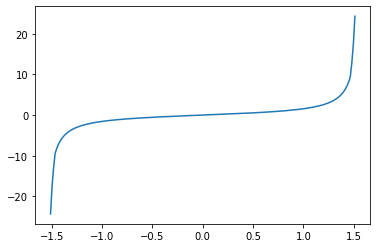

In [173]:
import matplotlib.pyplot as plt
plt.plot(xl,a)
plt.show()

In [137]:
lsize = 200
xl = np.linspace(-np.pi,np.pi,lsize)
np.tan(xl)

array([ 1.22464680e-16,  3.15842917e-02,  6.32316613e-02,  9.50056915e-02,
        1.26970983e-01,  1.59193688e-01,  1.91742062e-01,  2.24687067e-01,
        2.58103008e-01,  2.92068240e-01,  3.26665950e-01,  3.61985027e-01,
        3.98121053e-01,  4.35177427e-01,  4.73266660e-01,  5.12511873e-01,
        5.53048541e-01,  5.95026546e-01,  6.38612599e-01,  6.83993118e-01,
        7.31377682e-01,  7.81003184e-01,  8.33138872e-01,  8.88092520e-01,
        9.46218013e-01,  1.00792477e+00,  1.07368952e+00,  1.14407124e+00,
        1.21973009e+00,  1.30145192e+00,  1.39018018e+00,  1.48705800e+00,
        1.59348455e+00,  1.71119154e+00,  1.84234884e+00,  1.98971311e+00,
        2.15684125e+00,  2.34840424e+00,  2.57066139e+00,  2.83219906e+00,
        3.14512415e+00,  3.52707588e+00,  4.00479512e+00,  4.62086641e+00,
        5.44749515e+00,  6.61768749e+00,  8.40631813e+00,  1.14880732e+01,
        1.80797689e+01,  4.22212178e+01, -1.26684704e+02, -2.53243098e+01,
       -1.40526822e+01, -

In [28]:
x = 45
print(fast_tan(x), "vs", np.tan(x))

NameError: name 'pi_2' is not defined

# 5. Arcsine

# 6. Arcosine


In [3]:
import numpy as np
import matplotlib.pylab as plt

In [13]:
dat  = open("diff.bin", "rb").read()
dat = np.fromstring(dat, np.float32)
dat = dat.reshape(-1,4).T

C:\Users\takchoi\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [14]:
logdiff = np.log2(dat)

C:\Users\takchoi\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [16]:
xaxis = np.arange(4000) * 3.14 / 1000 - 3.14 * 2

In [80]:
fig = plt.figure()
ax = [0,0,0,0]
name = ["atan", "sin", "cos", "tan"]
for i in range(4):
    ax[i]= fig.add_subplot(4,1,i+1)
    ax[i].plot(xaxis, dat[i])
    ax[i].set_ylabel(name[i])
ax[3].set_xlabel('angle(radian)')

NameError: name 'plt' is not defined

In [270]:
RR = 3
_size = 100000
Verbose = 1
_model = None
_err = 9999
sets = [[0.1,np.pi/2],[np.pi/2,np.pi],[np.pi,5]]

for i in range(RR):
    x, gt = genData(_size, sets[i][0], sets[i][1], np.arctan)
    X, model = fitModel(x, cubic, gt)
    res = calcCost(model, X, gt, cubic, Verbose, i)
    if res < _err:
        _err = res
        _model = model
        print(i, res, model.intercept_, model.coef_)


Range low:0.100004 high:1.570796


ValueError: could not broadcast input array from shape (100000,3) into shape (100000)

In [ ]:
# atan
# atan(x) = x(a0 + a1 * x**2) / (b0 + b1 * x**2)
# => [x x^3 -y x^2 * y] [a0 a1 b0 b1] = 0


# (a0 + a1 * x**2) / (b0 + b1 * x) = y
# => [1 x^2 -y x * y] [a0 a1 b0 b1] = 0

In [219]:
def dlt_data(x, gt):
    n = x.shape[0]
    d = np.zeros((n, 4))
    d[:,0] = 1 #x
    d[:,1] = x ** 2
    d[:,2] = -gt
    d[:,3] = -x * gt
    return d

In [215]:
def train_model(dlt_data,full_matrices=False):
    _,_,v= np.linalg.svd(dlt_data,full_matrices=full_matrices)
    return v.T[:,-1]

In [220]:
class Model(object):
    def __init__(self, v):
        self.a0 = v[0]
        self.a1 = v[1]
        self.b0 = v[2]
        self.b1 = v[3]
    def predict(self, x):
        x2 = x ** 2
        y = (self.a0 + self.a1 * x2) /(self.b0 + self.b1 * x)
        return y
    def acos(self, x):
        negate = x < 0;
        x = abs(x);
        ret = -0.0187293;
        ret = ret * x;
        ret = ret + 0.0742610;
        ret = ret * x;
        ret = ret - 0.2121144;
        ret = ret * x;
        ret = ret + 1.5707288;
        ret = ret * np.sqrt(1.0-x);
        ret = ret - 2 * negate * ret;
        return negate * 3.14159265358979 + ret;

    def __str__(self):
        return "%.10f %.10f %.10f %.10f" % (
        self.a0, self.a1, self.b0, self.b1)

In [222]:
1/(4*3*2)

0.041666666666666664

In [223]:
RR = 3
_size = 100000
Verbose = 1
_model = None
_err = 9999
sets = [[0, 1]]
i=0
x, gt = genData(_size, sets[i][0], sets[i][1], np.sqrt)
X = dlt_data(x, gt)
v = train_model(X)
model = Model(v)
x, gt = genData(_size, sets[i][0], sets[i][1], np.sqrt, 0)
Y = model.predict(x)
err = np.abs(gt - Y)
idx = np.argmax(err)
print("MAX err", "idx", idx, "value", err[idx], "rad", x[idx])

Range low:0.000037 high:1.000000
Range low:0.000000 high:1.000000
MAX err idx 33315 value 2518.3914576734323 rad 0.33315333153331533


In [226]:
Y[idx:]

array([2.51896865e+03, 6.77983739e+02, 3.91883019e+02, ...,
       1.00720796e+00, 1.00721520e+00, 1.00722245e+00])

In [207]:
print(model)

-0.6867823401 0.6444705149 -0.2567862575 0.2169068713


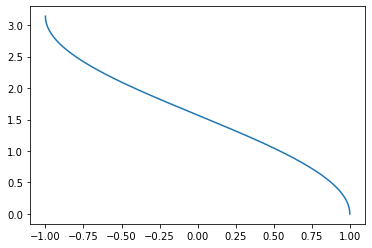

In [254]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(-1,1,_size), np.arccos(x))
plt.show()

In [192]:
model

array([0.36902421, 0.70167109, 0.54490339, 0.27305515])

In [178]:
x.shape

(100000,)

In [271]:
def quadInter(a0, a1, a2, f):
    af0x = f - a0[0]
    af1x = f - a1[0]
    af2x = f - a2[0]
    a01x = a0[0] - a1[0]
    a02x = a0[0] - a2[0]
    a12x = a1[0] - a2[0]
    t0 = af1x / a02x
    t1 = af2x / a01x
    t2 = af0x / a12x
    if 0:
        y = a0[1] * t0 * t1 
        y += a1[1] * t2 * -t1
        y += a2[1] * t2 * t0
    else:
        y = t1 * (a0[1] * t0 - a1[1] * t2) + a2[1] * t2 * t0
    return y


In [330]:
a = np.linspace(0.9,1,1001)
np.arcsin(a[:500])


array([1.11976951, 1.11999899, 1.12022856, 1.12045825, 1.12068805,
       1.12091796, 1.12114797, 1.1213781 , 1.12160833, 1.12183868,
       1.12206913, 1.1222997 , 1.12253038, 1.12276116, 1.12299206,
       1.12322307, 1.12345419, 1.12368542, 1.12391677, 1.12414822,
       1.12437979, 1.12461147, 1.12484326, 1.12507516, 1.12530718,
       1.12553931, 1.12577155, 1.12600391, 1.12623637, 1.12646896,
       1.12670165, 1.12693446, 1.12716739, 1.12740042, 1.12763358,
       1.12786684, 1.12810022, 1.12833372, 1.12856733, 1.12880106,
       1.1290349 , 1.12926886, 1.12950293, 1.12973713, 1.12997143,
       1.13020585, 1.13044039, 1.13067505, 1.13090982, 1.13114471,
       1.13137972, 1.13161485, 1.13185009, 1.13208545, 1.13232093,
       1.13255653, 1.13279224, 1.13302808, 1.13326403, 1.1335001 ,
       1.1337363 , 1.13397261, 1.13420904, 1.13444559, 1.13468226,
       1.13491905, 1.13515596, 1.13539299, 1.13563015, 1.13586742,
       1.13610482, 1.13634233, 1.13657997, 1.13681773, 1.13705

In [331]:
np.arcsin(a[500:])

array([1.2532359 , 1.25355631, 1.25387704, 1.25419807, 1.25451943,
       1.2548411 , 1.25516309, 1.25548539, 1.25580801, 1.25613096,
       1.25645422, 1.25677781, 1.25710172, 1.25742595, 1.25775051,
       1.25807539, 1.2584006 , 1.25872614, 1.259052  , 1.2593782 ,
       1.25970473, 1.26003158, 1.26035878, 1.2606863 , 1.26101416,
       1.26134236, 1.26167089, 1.26199977, 1.26232898, 1.26265853,
       1.26298843, 1.26331866, 1.26364924, 1.26398017, 1.26431144,
       1.26464306, 1.26497503, 1.26530734, 1.26564001, 1.26597303,
       1.2663064 , 1.26664013, 1.26697421, 1.26730864, 1.26764344,
       1.26797859, 1.2683141 , 1.26864998, 1.26898622, 1.26932282,
       1.26965978, 1.26999711, 1.27033481, 1.27067288, 1.27101131,
       1.27135012, 1.2716893 , 1.27202885, 1.27236878, 1.27270909,
       1.27304977, 1.27339083, 1.27373227, 1.27407409, 1.27441629,
       1.27475888, 1.27510185, 1.27544521, 1.27578896, 1.2761331 ,
       1.27647762, 1.27682254, 1.27716785, 1.27751356, 1.27785

In [292]:
np.pi/360

0.008726646259971648

In [6]:
import tensorflow.keras.backend as K
from tensorflow import keras

In [7]:
def binary_focal_loss_with_logits(alpha, gamma=2.0):
    if alpha >= 0:
        alpha_t0 = alpha
        alpha_t1 = 1 - alpha
    else:
        alpha_t0 = 1
        alpha_t1 = 1
    def binary_focal_loss(y_true, y_pred, return_type=0):
        epsilon = K.epsilon()
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, epsilon, 1.-epsilon)
        #pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        #pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
        if return_type==0:
            return -K.mean(y_true * alpha_t0 * K.pow(1. - y_pred, gamma) * K.log(y_pred)) \
               -K.mean((1 - y_true) * alpha_t1 * K.pow(y_pred, gamma) * K.log(1. - y_pred))
        else:
            return -(y_true * alpha_t0 * K.pow(1. - y_pred, gamma) * K.log(y_pred)) \
               -((1 - y_true) * alpha_t1 * K.pow(y_pred, gamma) * K.log(1. - y_pred))
    return binary_focal_loss

In [8]:
R = 1000
NS = np.linspace(0,1.0,R)
a = K.constant(np.vstack([np.ones((1,R)),np.zeros((1,R))]))
b=  K.constant(np.vstack([np.expand_dims(NS,0),np.expand_dims(NS,0)]))
gammas = [0.5, 1, 2, 3, 4]
c0_1 = binary_focal_loss_with_logits(0.5, -1)(a, b, 1)
c1 = binary_focal_loss_with_logits(1, -1)(a, b, 1)
c2 = binary_focal_loss_with_logits(2, -1)(a, b, 1)
c3 = binary_focal_loss_with_logits(3, -1)(a, b, 1)
c4 = binary_focal_loss_with_logits(4, -1)(a, b, 1)
ce = keras.backend.binary_crossentropy(a, b)

In [9]:
d = [K.eval(c) for c in [c0_1, c1, c2, c3, c4]]
dce = K.eval(ce)

In [10]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot(NS, d[i][0], label='focal_loss[%.1f,noweight]' % gammas[i])
plt.plot(NS, dce[0],color='black',label='cross_entropy')
plt.ylim([0,5])
plt.legend()
plt.title("binary loss on ground truth is 1")
plt.show()

<Figure size 640x480 with 1 Axes>

In [102]:
def categorical_focal_loss_with_logits(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss(y_true, y_pred, return_type=0):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        if return_type == 0: # totoal loss
            return K.mean(K.sum(loss, axis=-1))
        elif return_type == 1: # loss per prediction
            return K.sum(loss, axis=-1)
        else:
            return loss # loss per each class of a prediction
        
    return categorical_focal_loss


In [103]:

a = K.constant(np.array([[1.0,0.0],[1.0,0.0]]))
b=  K.constant(np.array([[0.9,0.5],[0.1,0.5]]))
c4 = categorical_focal_loss_with_logits(1, 0)(a, b, 2)
ce = keras.backend.categorical_crossentropy(a, b)


In [104]:
aa = K.eval(c4)
bb = K.eval(ce)
print(aa)
print(bb)

[[0.44183278 0.        ]
 [1.7917595  0.        ]]
[0.44183278 1.7917595 ]


In [105]:
R = 1000
NS = np.linspace(0,1.0,R)
a = K.constant(np.vstack([np.ones((1,R)),np.zeros((1,R))]).T)
b=  K.constant(np.vstack([np.expand_dims(NS,0),np.ones((1,R))*0.5]).T)
gammas = [0.5, 1, 2, 3, 4]
c0_1 = categorical_focal_loss_with_logits(1, 0.5)(a, b, 1)
c1 = categorical_focal_loss_with_logits(1, 1)(a, b, 1)
c2 = categorical_focal_loss_with_logits(1, 2)(a, b, 1)
c3 = categorical_focal_loss_with_logits(1, 3)(a, b, 1)
c4 = categorical_focal_loss_with_logits(1, 4)(a, b, 1)
ce = keras.backend.categorical_crossentropy(a, b)

In [106]:
d = [K.eval(c) for c in [c0_1, c1, c2, c3, c4]]
dce = K.eval(ce)

In [112]:
dce.shape

(1000,)

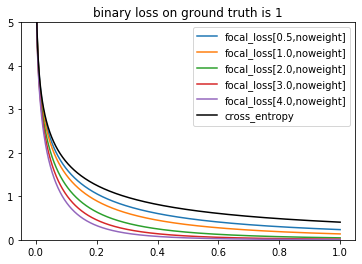

In [113]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot(NS, d[i], label='focal_loss[%.1f,noweight]' % gammas[i])
plt.plot(NS, dce,color='black',label='cross_entropy')
plt.ylim([0,5])
plt.legend()
plt.title("binary loss on ground truth is 1")
plt.show()

In [237]:
def similar3d_t(x=0,y=0,z=0,t=[0,0,0],s=[1,1,1]):
    rz = np.array([
        [np.cos(z), -np.sin(z), 0, 0],
        [np.sin(z), np.cos(z), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    ry = np.array([
        [np.cos(y), 0, np.sin(y), 0],
        [0, 1, 0, 0],
        [-np.sin(y), 0, np.cos(y), 0],
        [0, 0, 0, 1]
    ])
    rx = np.array([
        [1, 0, 0, 0],
        [0, np.cos(x), -np.sin(x), 0],
        [0, np.sin(x), np.cos(x), 0],
        [0, 0, 0, 1]
    ])
    t = np.array([
        [1, 0, 0, t[0]],
        [0, 1, 0, t[1]],
        [0, 0, 1, t[2]],
        [0, 0, 0, 1]
    ])
    s = np.array([
        [s[0], 0, 0, 0],
        [0, s[1], 0, 0],
        [0, 0, s[2], 0],
        [0, 0, 0, 1]
    ])
    H = rz @ ry @ rx @ t @ s
    return H


In [243]:
x = np.array([[1.,1.,1.,1.]]).T
H = similar3d_t(z=np.pi/2,s=[2.,2.,3.],t=[0,0,3])

In [244]:
X = H @ x
print(x, '=>\n', X)

[[1.]
 [1.]
 [1.]
 [1.]] =>
 [[-2.]
 [ 2.]
 [ 6.]
 [ 1.]]


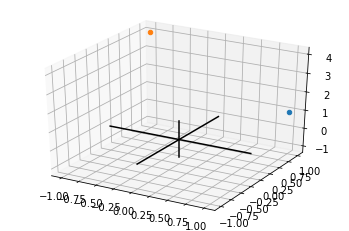

In [230]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
axis=np.linspace(-1,1,100)
zero=np.zeros_like(axis)
ax.plot3D(axis,zero,zero,'black')
ax.plot3D(zero,axis,zero,'black')
ax.plot3D(zero,zero,axis,'black')
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.scatter3D(x[0], x[1], x[2], 'blue')
ax.scatter3D(X[0], X[1], X[2], 'green')

plt.show()


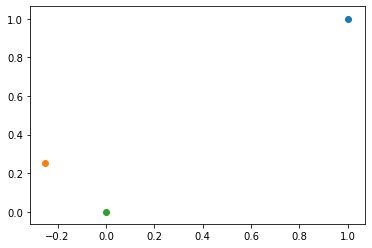

In [196]:
plt.scatter([1],[1])
plt.scatter([-0.25],[0.25])
plt.scatter([0],[0])